<a href="https://colab.research.google.com/github/rpizarrog/probabilidad-y-estad-stica/blob/master/2024/Caso_33_Distribuci%C3%B3n_muestral_de_la_media.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objetivo

Simular la distribución muestral de la media a partir de diversas muestras

# Descripción

Se simula población con sueldos de trabajadores de una Institución educativa. La distribución de esta población no es normal es decir, no tiene características de ser distribución normal.

Se crean datos relacionados con la población y se determinan los parámetros descriptivos.

Se crean varias muestras de $100$, $1000$ y $10000$ muestras, con tamaño de muestra de $n=100$ observaciones diferentes relacionados con la población de tamaño $N=6500$ y se determinan la media aritmética de cada muestra.

Se determina la distribución muestral de la media de las $100$, $1000$ y $10000$ muestras y se identifica que la distribución muestral de la media se acerca a una distribución normal además de que la media de la distribución muestral se acerca a la media de la población.

Se repite el proceso con varios tamaños de muestras y se observa como la media de cada muestra se acerca a la media poblacional.


# Fundamento teórico

Si se organizan las medias de todas las muestras posibles (por decir cien y mil) en una distribución de probabilidad, el resultado recibe el nombre de distribución muestral de la media $\mu_{\bar{x}}$.

Distribución muestral de la media es la distribución de probabilidad de todas las posibles medias de las muestras de un determinado tamaño muestral de la población. (lind2015).

Una distribución muestral de la media es una distribución de todas las posibles medias de muestras de un tamaño fijo tomadas de una población. Esta distribución se utiliza para hacer inferencias sobre la media de la población basándose en muestras aleatorias.



# Desarrollo

## Cargar librerías



In [311]:
import pandas as pd
import numpy as np

import random

import matplotlib.pyplot as plt

from matplotlib.ticker import ScalarFormatter
import seaborn as sns


## Crear funciones



In [312]:
def f_histograma(ax, datos, error, contexto):
    # Crear el histograma con densidad en el eje dado
    ax.hist(datos, bins=30, edgecolor='black', density=True, alpha=0.6, color='blue')

    # Añadir la curva de densidad
    sns.kdeplot(datos, color='green', linewidth=2, ax=ax)

    # Calcular la media de los datos
    media = np.mean(datos)

    # Añadir una línea vertical en la media
    # Calcular la media de los datos
    media = np.mean(datos)

    # Añadir una línea vertical en la media
    ax.axvline(media, color='red', linestyle='--', linewidth=2, label=f'Me: {media:.4f}; Er. Mu:{error:.4f}')


    ax.set_title('Histograma ' + contexto)
    ax.set_xlabel('Datos')
    ax.set_ylabel('Densidad')

    # Ajustar el formateador del eje y para eliminar la notación científica
    ax.yaxis.set_major_formatter(plt.ScalarFormatter(useMathText=True))
    ax.yaxis.get_offset_text().set_visible(False)

    # Añadir la leyenda
    ax.legend()

# Función que recibe una población y devuelve las medias muestrales,
# la media de todas las medias muestrales y el error de la media
def f_media_muestral(q, datos, n):
    muestras = []
    m_muestras = []
    media_poblacional = np.mean(datos)

    # Tomar q muestras y calcular la media de cada muestra
    for _ in range(q):
        muestra = np.random.choice(datos, n, replace=False)
        muestras.append(muestra)
        m_muestras.append(np.mean(muestra))

    media_muestral = np.mean(m_muestras)
    error_muestral = abs(media_poblacional - media_muestral)

    return m_muestras, media_muestral, error_muestral


## Crear datos

$$
poblacion = \text{ {x | x es el sueldo de un trabajador de una Institución
educativa;  }} \therefore \\
x_1, x_2, x_3, ... ,x_{N=6500}
$$

### Datos iniciales



In [330]:
N = 650 # Cantidad de datos de población
rango =  [5000, 35000] # Rango de sueldos
n = 100  # Cantidad de datos de cada muestra
q1 = 100  # Cantidad de muestras m1, m2, m3 ... m100
q2 = 1000  # Cantidad de muestras m1, m2, m3 ... m1000
q3 = 10000 # Cantidad de muestras m1, m2, m3 ... m10000
q4 = 100000 # Cantidad de muestras m1, m2, m3 ... m100000
print ("Tamaño de población:", N)
print ("Rango de sueldos:", rango)
print ("Tamaño de muestra: ", n)
print ("Cantidad de muestras q1: ", q1)
print ("Cantidad de muestras q2: ", q2)
print ("Cantidad de muestras q3: ", q3)
print ("Cantidad de muestras q4: ", q4)

Tamaño de población: 650
Rango de sueldos: [5000, 35000]
Tamaño de muestra:  100
Cantidad de muestras q1:  100
Cantidad de muestras q2:  1000
Cantidad de muestras q3:  10000
Cantidad de muestras q4:  100000


In [331]:
# La semilla
np.random.seed(2024)
random.seed(2024)

Se genera una población de sueldos entre 5000 y 30000

In [332]:
# Generar la población de sueldos
sueldos = np.random.randint(rango[0], rango[1], size=N)

print ("La población de la variable sueldos en un rango de $",rango[0], "a $",rango[1], "de tamaño N=", N )
print(sueldos, sep=", ")


La población de la variable sueldos en un rango de $ 5000 a $ 35000 de tamaño N= 650
[12816 24962 24040  7688 19875  7494 21567 12977 24583 33609  5316 31851
 29650 17610 34605 22916  6009 17446 17655 17535 23634 19958  9447 23799
  8595  9187  9135 10174 18426 10303 32465 25326 24162  7804 18087  7145
  5150 18083 34526 30207 16845 20005 26053 27515 19212 24001 15838 18622
 12166  6428 13328 17050 29673 27362 10511 19000 27248 20797  5606  6933
 15336 11071 26888 26547 33919 23790 32787 21688 31598  8391  5359 14096
 24917 25509  8094 27782  6584 13892 22453 10128 21001  8489  7229 27317
 33736 29972  8509 17295 33850 34323 25146 17540 33026 26051  5525 29706
 26878 15839  9756 18929 11504 22401  8037 25724 14494 27719 23555 33503
 25282 29579 26315 15104 34354 31635 15159 26716 13794 11576 22382 11195
 26569 23927 29537 23940  8296 25470  5595 27323 14609 18556 31524  6450
 19698  7208 31059 18270 12405 11150  6223 34468 14759 29943 22420 34581
 19736 32608 22738  6239 11410 14081 26

### Media poblacional

$$
\mu = \frac{\sum{sueldo_x}}{N} = 19525.9477
$$

In [333]:
# Calcular la media poblacional
media_poblacional = np.mean(sueldos)
print(f"La media poblacional es: {media_poblacional:.4f}")

La media poblacional es: 19525.9477


## Muestra

Se determina una primera muestra de $n=100$ trabajadores sin reemplazo que significa que no se puede repetir el trabajador el valor de $x_{trabajador}$

$$
muestra = \text{ {x | x es sueldo de un trabajador de la población;  }} \therefore
\\
x_1, x_2, x_3, ... ,x_{n=100}
$$

Recordando la fórmula para calcular la media aritmética de una muestra:

$$
\bar{x} = \frac{\sum{muestra}}{n} = 18581.73
$$




In [334]:
# Obtención de una muestra aleatoria simple
muestra = random.sample(list(sueldos), n)

media_muestra = np.mean(muestra)
print ("La media de la muetra", np.round(media_muestra, 4))

La media de la muetra 18581.73


## Error muestral

El error muestral es porque los estadísticos no son valores numéricos igual que los parámetros de la población, siempre existirá una diferencia.

$$
\text { error muestral} \\
s_{\bar{x}} =|\mu - \bar{x} \\
|19525.9477- 18581.73 = 944.2177|
$$

In [318]:
error_muestral = abs(media_poblacional - media_muestra)
print ("Error muestral: ", np.round(error_muestral, 4))

Error muestral:  944.2177


Significa que hay un error muestral $s_{\bar{x}}$ con respecto a la media poblacional y la media de la muestra de aproximadamente $944$ unidades.

## Histogramas

Se visualizan los histogramas de la población y de la muestra. Las densidades pueden observarse a diferente escala.

Al observar el histograma y la densidad tanto de la población como de la muestra, se observa que no tienen un coportamiento normal, hay muchos valores concetrados en mismos rangos, de tal forma que la densidad se observa achatada.



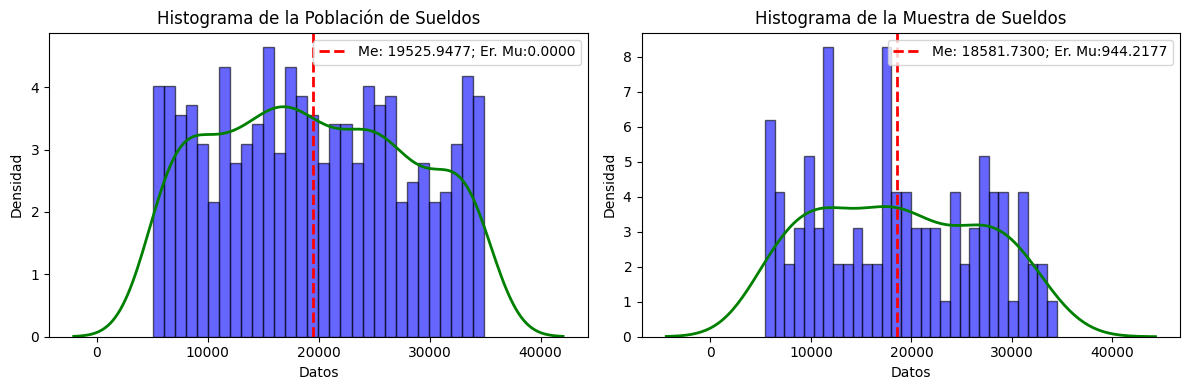

In [335]:
# Llamar a la función f_histograma para la población y la muestra
# Crear una figura con dos subplots uno al lado del otro
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Llamar a la función f_histograma para la población y la muestra
f_histograma(axs[0], sueldos, 0, 'de la Población de Sueldos')
f_histograma(axs[1], muestra, error_muestral, 'de la Muestra de Sueldos')

plt.tight_layout()
plt.show()


## Media muestral de 100 muestras

Se determinan cien (100) muestras de 100 elementos cada una, luego se organizan las medias de todas las muestras en una distribución de probabilidad, el resultado recibe el nombre de distribución muestral de la media (lind2015?).

La variables $x_i$ como parte de la muestra puede ser cualquier trabajador de la población que representa a la población.

Media muestral de la media $\bar{x_i}$

* $\bar{x}_{1}$ significa la media aritmética la primera muestra
* $\bar{x}_{2}$ significa la media aritmética la segunda muestra
* $\bar{x}_{3}$ significa la media aritmética la tercera muestra
* $\bar{x}_{i}$ significa la media aritmética la iésima muestra $ \therefore$
* $\bar{x}_{100}$ significa la media aritmética la muestra $100$

Se manda llamar la función *f_media_muestral(q1, sueldos, n)* y devuelve las medias de cada muestra y la media muestral de todas las medias además del error muestral.

El valor de *q1* es la cantidad de muestras previamente inicialziado.

In [336]:

# Mostrar las medias de las muestras
m_muestras_100, m_muestral_100, error_muestral_100 = f_media_muestral(q1, sueldos, n)

print(m_muestras_100)

print ("Media muestral de ", q1, "muestras",np.round(m_muestral_100, 4) )

print ("Eror muestral de la media de ", q1, "muestras",np.round(error_muestral_100, 4) )

[19482.37, 18548.95, 19808.72, 18816.86, 19762.36, 18960.73, 19666.9, 18776.13, 20339.29, 18386.76, 19957.13, 19402.5, 20300.52, 19261.46, 19527.21, 18735.44, 19253.1, 21102.38, 20776.49, 20230.16, 21313.09, 18241.97, 20074.09, 19991.17, 19951.31, 19813.84, 18471.25, 20163.99, 19840.76, 19178.53, 18919.7, 19134.36, 19983.03, 19586.59, 18845.51, 19129.0, 18901.61, 18621.95, 19204.93, 20329.53, 20127.77, 19743.91, 18586.98, 20323.64, 19908.24, 20285.27, 18362.46, 20098.16, 19942.12, 18673.46, 19760.37, 18622.16, 21286.74, 19356.85, 18744.5, 19229.86, 20270.98, 19860.43, 19887.91, 17705.24, 18694.26, 19960.01, 20070.27, 18800.75, 21206.66, 17911.52, 20084.19, 20662.4, 18799.85, 18959.37, 19350.73, 19659.3, 19827.31, 19556.98, 18717.16, 18747.43, 19053.64, 18871.53, 19440.68, 21320.21, 20080.2, 19326.52, 18914.6, 18345.77, 19626.24, 18679.98, 19086.29, 19566.54, 19382.82, 19675.49, 19748.62, 19364.91, 20121.95, 19658.46, 19842.06, 19793.31, 20053.3, 20516.9, 19719.81, 19055.98]
Media muest

Con todas las medias muestrales de las 100 muetras se hace el histograma y se compara la media muestral.


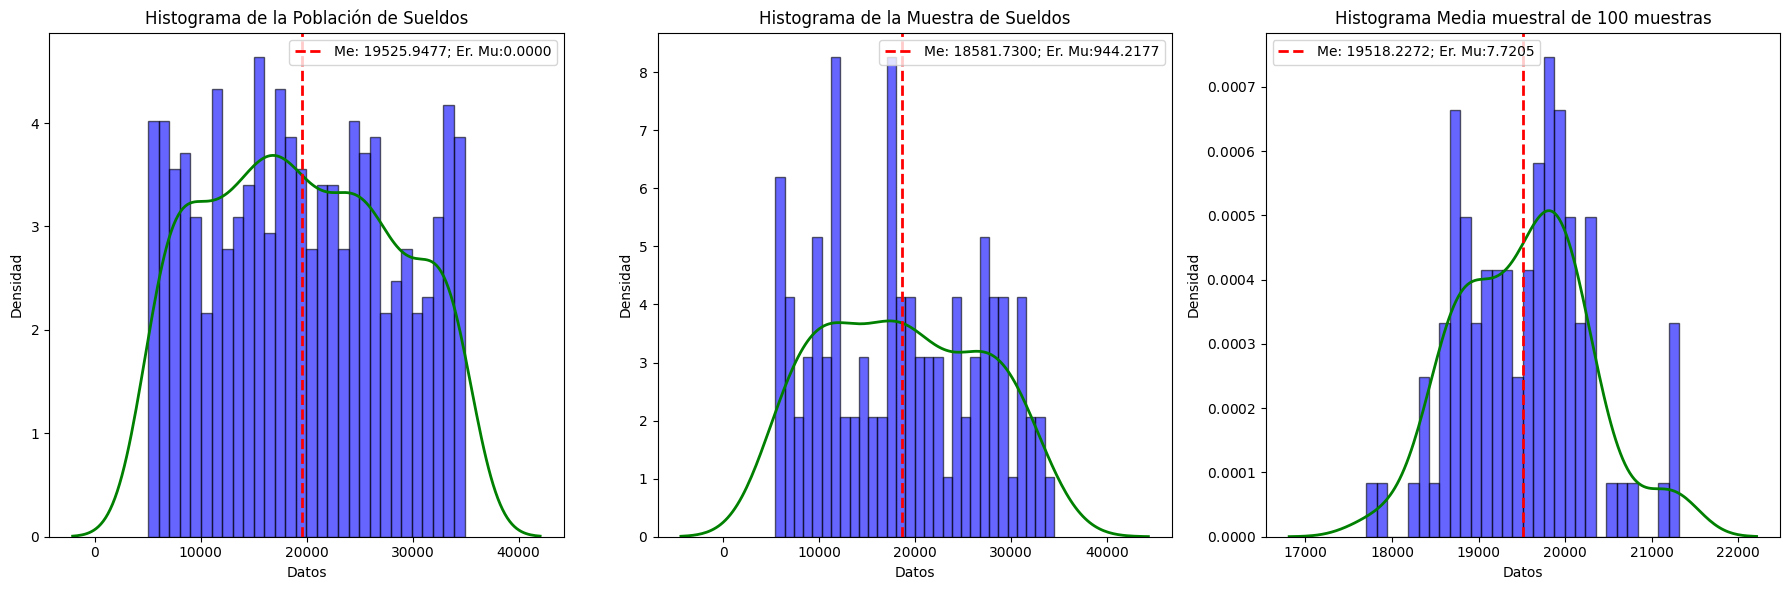

In [337]:
# Llamar a la función f_histograma para la población y la muestra
# Crear una figura con dos subplots uno al lado del otro
# Crear una figura con tres subplots en dos filas
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Llamar a la función f_histograma para la población y la muestra
f_histograma(axs[0], sueldos, 0,'de la Población de Sueldos')
f_histograma(axs[1], muestra, error_muestral, 'de la Muestra de Sueldos')
f_histograma(axs[2], m_muestras_100, error_muestral_100, 'Media muestral de 100 muestras')

plt.tight_layout()
plt.show()

## Media muestral de 1000 muestras

Se determinan mil (1000) muestras de $n=100$ elementos cada una, luego se organizan las medias de todas las muestras en una distribución de probabilidad.

Se manda llamar la función *f_media_muestral(q2, sueldos, n )* y devuelve las medias de cada muestra y la media muestral de todas las medias además del error muestral.

El valor de *q2* es la cantidad de muestras previamente inicializado.



In [338]:
# Mostrar las medias de las muestras
m_muestras_1000, m_muestral_1000, error_muestral_1000 = f_media_muestral(q2, sueldos, n)

print(m_muestras_1000)

print ("Media muestral de ", q2, "muestras",np.round(m_muestral_1000, 4) )

print ("Eror muestral de la media de ", q2, "muestras",np.round(error_muestral_1000, 4) )

[19784.67, 19800.25, 20556.87, 20156.28, 18754.89, 19803.05, 18644.72, 19581.11, 20218.24, 20398.49, 19604.91, 19387.41, 19942.57, 18948.4, 19159.79, 20309.0, 21330.86, 19850.74, 20331.08, 21091.49, 18188.44, 19741.92, 19437.39, 20567.43, 19015.13, 19904.12, 19397.21, 19422.77, 19979.86, 18704.5, 20295.44, 19152.26, 19824.08, 19825.48, 19318.95, 19151.57, 20441.64, 18488.2, 20919.95, 20153.95, 18905.43, 20139.71, 19548.83, 19756.63, 19588.82, 19628.01, 19314.61, 19737.68, 19798.33, 19472.77, 19611.39, 18951.17, 20161.4, 19650.6, 19740.02, 20149.46, 20153.02, 17830.47, 19914.95, 18657.21, 19542.62, 19502.15, 19869.33, 21095.81, 18805.8, 19900.09, 20309.29, 19673.18, 19465.91, 18514.1, 19140.44, 18791.72, 20178.49, 19832.42, 20100.68, 21108.83, 19087.24, 18389.29, 19742.92, 20130.37, 19112.0, 20292.52, 18735.88, 19972.72, 18808.25, 19458.14, 18706.32, 19884.16, 19448.29, 19219.32, 19764.13, 20055.87, 19955.05, 20124.06, 19423.75, 20556.71, 19472.62, 19986.68, 18150.64, 19751.73, 18916.74

Al calcular la media muestral de las medias de las $1000$ muestras se comienza a visualizar una curva suavizada mu cercana a la curva de campana.

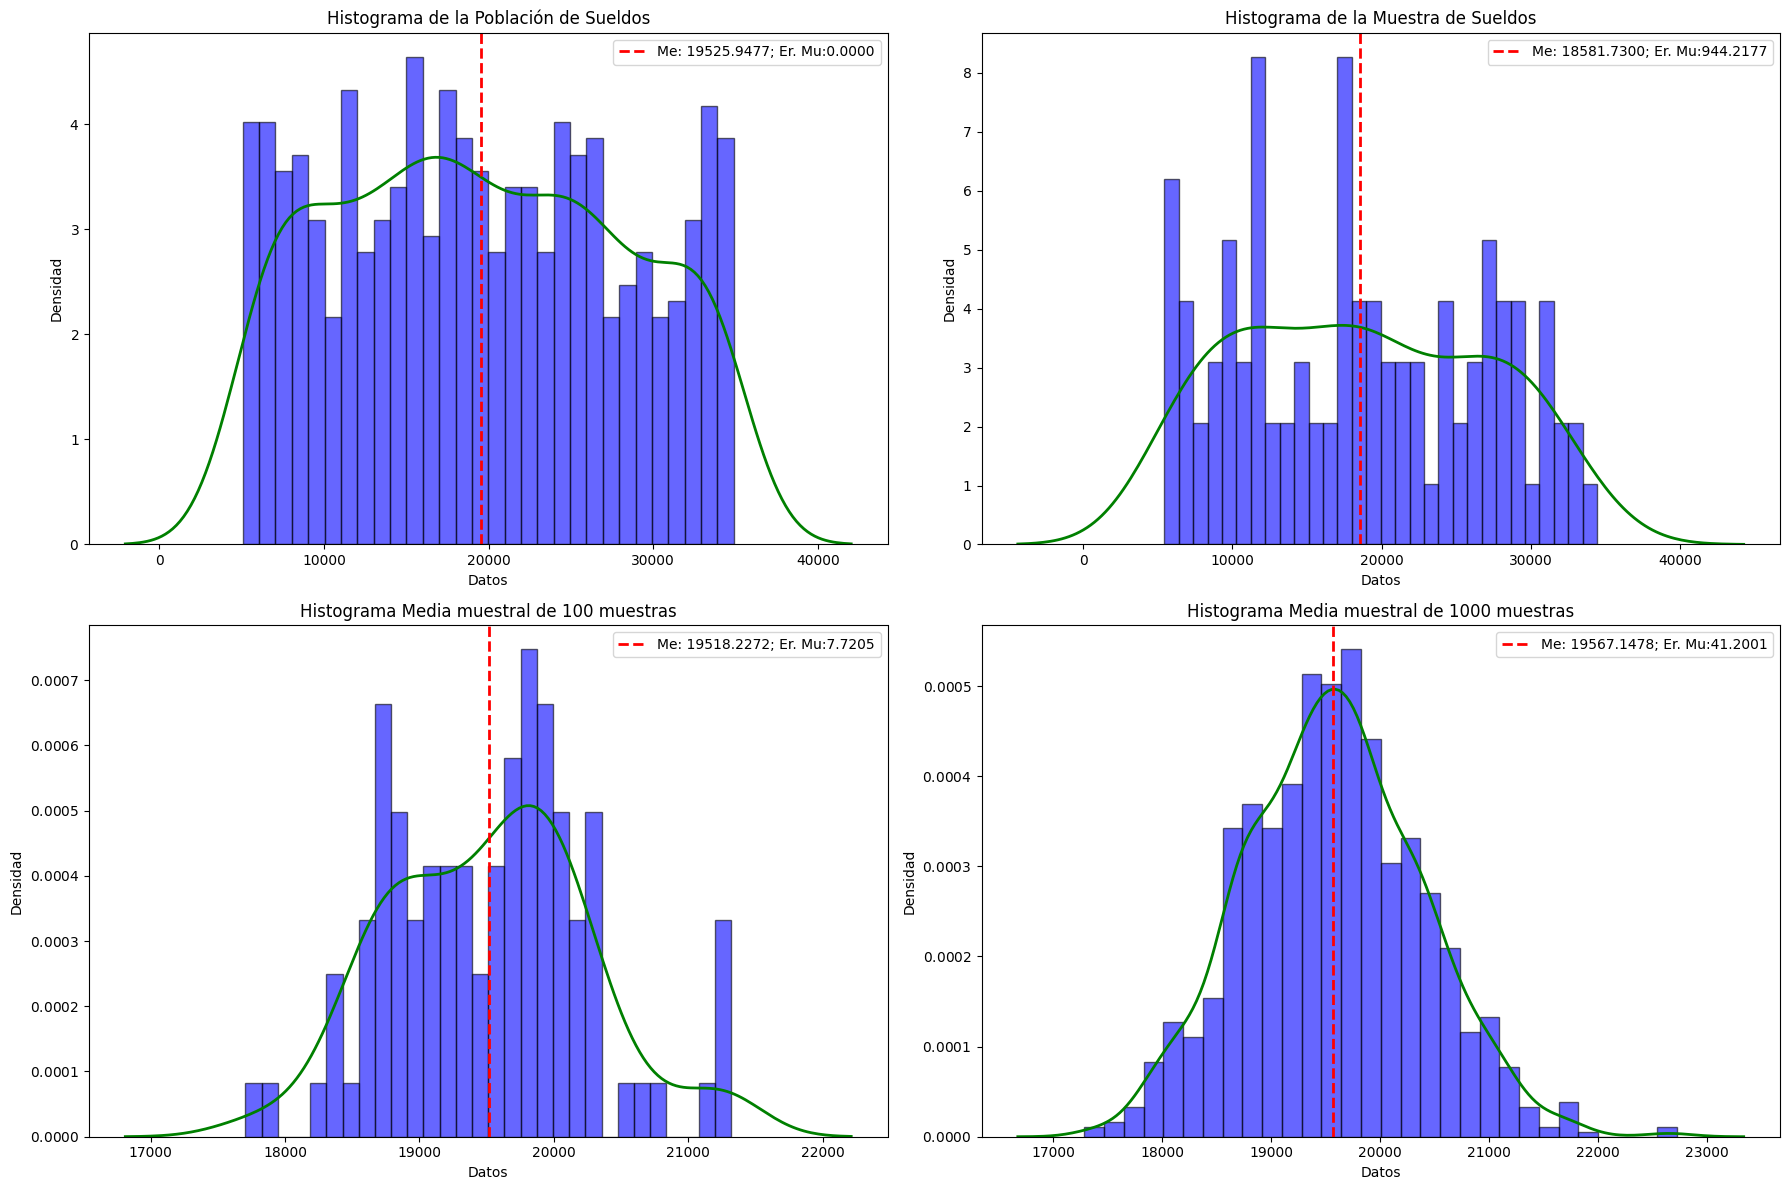

In [339]:
# Llamar a la función f_histograma para la población y la muestra
# Crear una figura con cuatro subplots en dos filas y dos columnas
fig, axs = plt.subplots(2, 2, figsize=(18, 12))

# Llamar a la función f_histograma para la población, la muestra y las medias muestrales
f_histograma(axs[0, 0], sueldos, 0, 'de la Población de Sueldos')
f_histograma(axs[0, 1], muestra, error_muestral, 'de la Muestra de Sueldos')
f_histograma(axs[1, 0], m_muestras_100, error_muestral_100, 'Media muestral de 100 muestras')
f_histograma(axs[1, 1], m_muestras_1000, error_muestral_1000, 'Media muestral de 1000 muestras')

# Mostrar los histogramas
plt.tight_layout()
plt.show()


## Media muestral de 10000 muestras

Se determinan diez mil (10000) muestras de $n=100$ elementos cada una, luego se organizan las medias de todas las muestras en una distribución de probabilidad.

Se manda llamar la función *f_media_muestral(q3, sueldos, n)* y devuelve las medias de cada muestra y la media muestral de todas las medias además del error muestral.

El valor de q3 es la cantidad de meustras previamente inicialziado.



In [340]:
# Mostrar las medias de las muestras
m_muestras_10000, m_muestral_10000, error_muestral_10000 = f_media_muestral(q3, sueldos, n)

print(m_muestras_10000)

print ("Media muestral de ", q3, "muestras",np.round(m_muestral_10000, 4) )

print ("Eror muestral de la media de ", q3, "muestras",np.round(error_muestral_10000, 4) )

[19464.63, 19148.03, 19465.87, 20009.03, 20048.43, 20893.69, 19889.76, 20210.96, 19678.42, 18941.0, 20635.78, 18141.83, 20046.95, 19935.04, 20061.67, 19174.66, 18222.05, 18422.22, 18317.83, 19502.61, 19449.8, 19093.89, 19622.81, 18651.76, 19459.64, 19506.36, 20376.55, 19147.48, 18768.24, 20585.63, 19899.72, 19446.78, 18797.84, 18881.41, 19611.94, 19466.71, 20171.98, 20307.7, 18414.5, 19563.87, 19129.7, 19998.85, 18897.64, 19131.3, 18661.98, 20709.42, 19005.98, 19812.45, 18773.34, 20153.08, 19424.85, 20925.94, 18553.63, 20173.11, 18912.81, 19976.81, 19126.97, 20790.06, 19094.52, 19881.83, 18939.12, 18949.94, 21317.0, 18078.76, 19227.04, 18985.36, 20052.92, 20977.08, 21206.95, 19271.74, 20756.0, 19740.32, 18651.77, 19966.13, 20125.69, 20573.59, 20429.71, 20686.86, 19948.62, 20877.21, 20480.81, 19222.39, 19303.83, 18550.39, 19766.22, 20284.35, 20286.25, 19404.5, 19286.97, 20934.87, 19324.13, 20111.22, 19758.57, 19615.23, 17570.29, 19523.44, 20754.46, 19755.16, 19461.72, 19695.65, 19326.04

Al calcular la media muestral de las medias de las $10000$ muestras se dfine mejor una curva suavizada de gauss.

Al tener una curva de campana en la visualizaición de la distribución de las medias se debe interpretar que entre mas muestras se tengan y se calcule la media de todas esas muestras los datos tendra´un comportamiento normal.

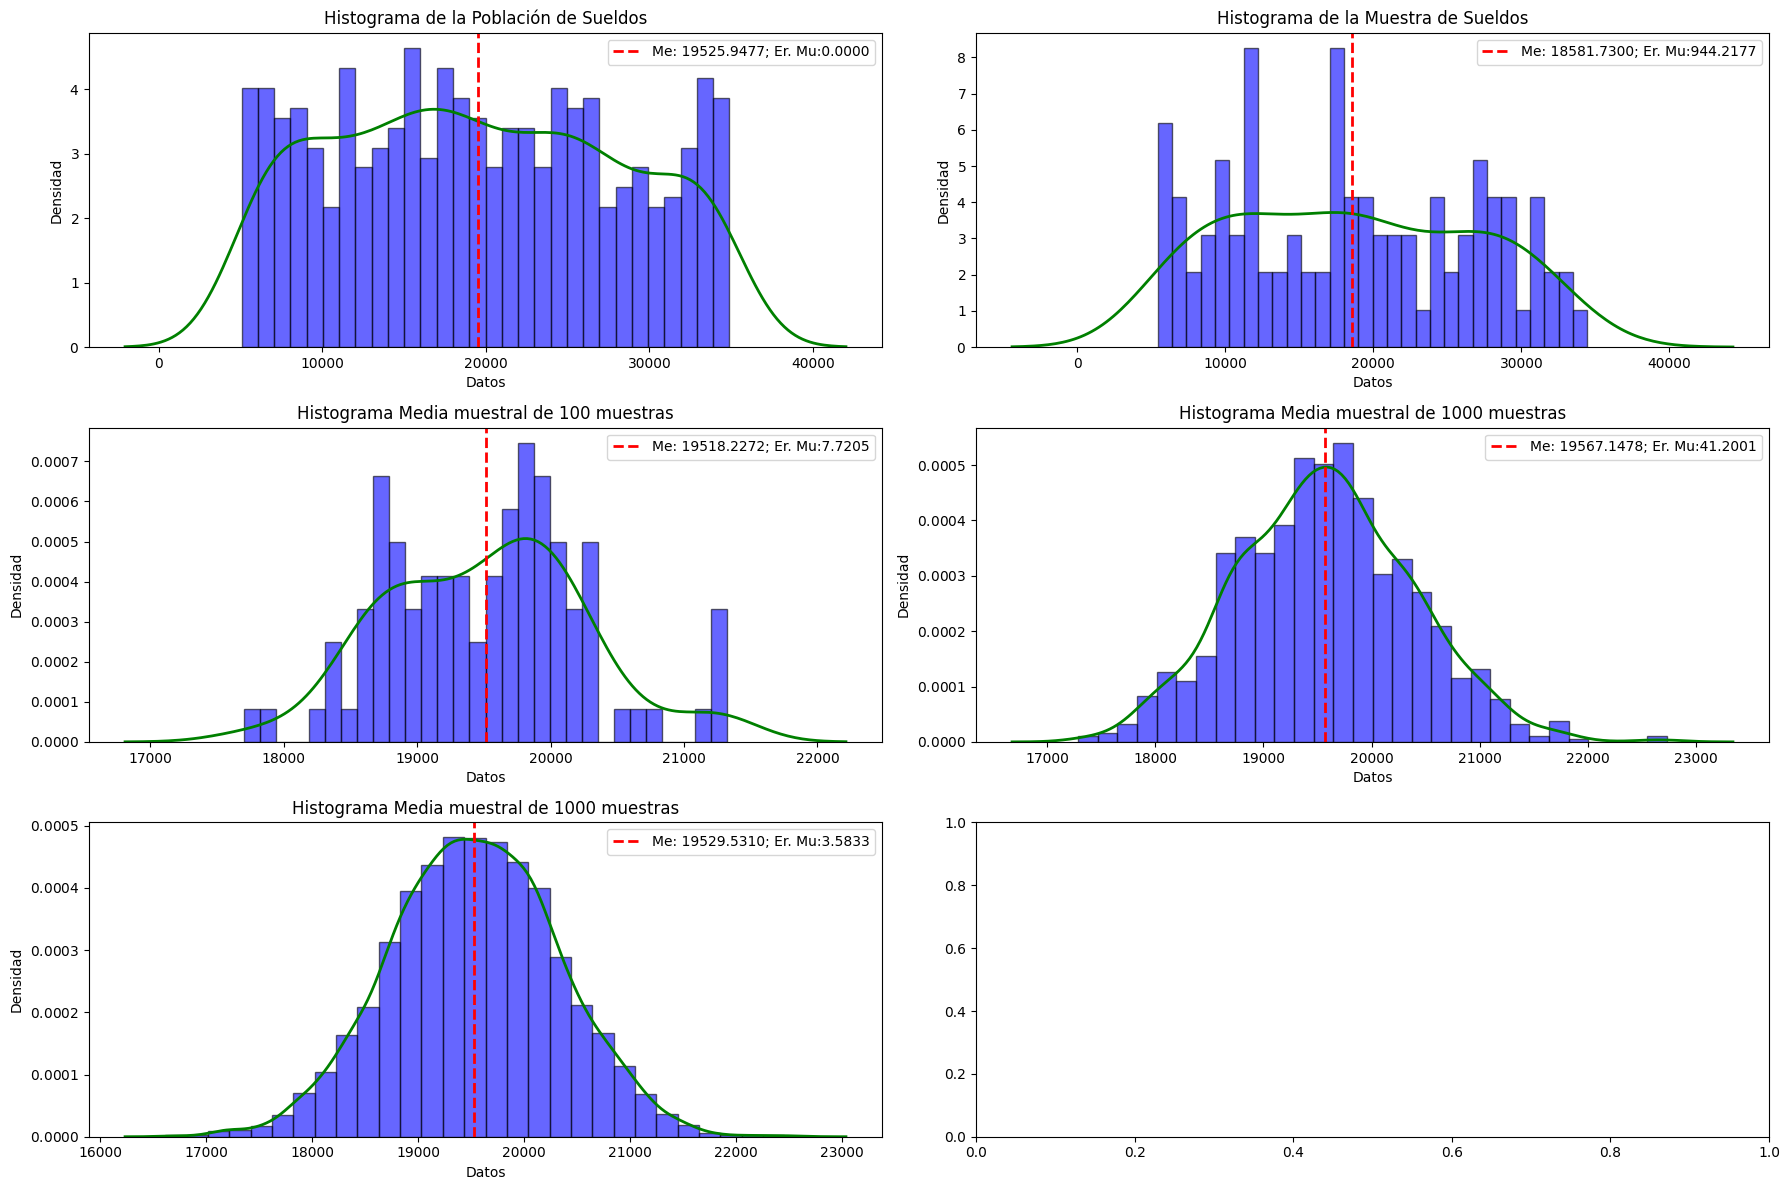

In [341]:
# Llamar a la función f_histograma para la población y la muestra
# Crear una figura con cuatro subplots en dos filas y dos columnas
fig, axs = plt.subplots(3, 2, figsize=(18, 12))

# Llamar a la función f_histograma para la población, la muestra y las medias muestrales
f_histograma(axs[0, 0], sueldos, 0, 'de la Población de Sueldos')
f_histograma(axs[0, 1], muestra, error_muestral, 'de la Muestra de Sueldos')
f_histograma(axs[1, 0], m_muestras_100, error_muestral_100, 'Media muestral de 100 muestras')
f_histograma(axs[1, 1], m_muestras_1000, error_muestral_1000, 'Media muestral de 1000 muestras')
f_histograma(axs[2, 0], m_muestras_10000, error_muestral_10000, 'Media muestral de 1000 muestras')

# Mostrar los histogramas
plt.tight_layout()
plt.show()

¿Qué sucederá con 100000 (cien mil muestras)?

## Media muestral de 100000 muestras

Se determinan diez mil (100000) muestras de $n=100$ elementos cada una, luego se organizan las medias de todas las muestras en una distribución de probabilidad.

Se manda llamar la función *f_media_muestral(q4, sueldos, n)* y devuelve las medias de cada muestra y la media muestral de todas las medias además del error muestral.

El valor de q4 es la cantidad de meustras previamente inicialziado.

In [342]:
# Mostrar las medias de las muestras
m_muestras_100000, m_muestral_100000, error_muestral_100000 = f_media_muestral(q4, sueldos, n)

print(m_muestras_100000)

print ("Media muestral de ", q4, "muestras",np.round(m_muestral_100000, 4) )

print ("Eror muestral de la media de ", q4, "muestras",np.round(error_muestral_100000, 4) )

[21404.66, 18449.66, 19424.61, 18718.85, 19933.15, 19935.61, 18782.32, 18596.43, 18868.25, 18594.41, 18775.93, 19582.02, 20031.8, 19320.76, 19545.58, 19279.14, 19660.82, 20290.95, 19897.75, 20171.65, 19842.83, 19661.22, 18870.66, 19904.41, 19174.37, 19288.68, 19308.77, 20256.31, 19461.77, 18685.94, 19586.55, 18063.11, 19997.27, 19782.04, 21242.07, 19898.57, 19801.61, 20985.52, 20105.48, 18271.77, 19865.11, 20932.7, 19969.03, 19071.73, 18750.09, 19555.69, 19781.09, 19558.95, 19006.31, 20327.95, 19621.98, 20153.21, 19534.55, 19515.31, 19999.41, 19595.09, 20255.53, 20078.28, 19260.99, 18590.04, 19420.87, 18961.84, 17274.65, 19810.61, 20243.35, 19772.15, 19250.19, 19723.86, 19576.11, 18719.46, 19894.91, 20335.25, 20030.38, 18335.52, 18787.36, 20399.32, 18988.57, 20365.97, 19342.71, 20500.68, 19575.01, 20422.31, 20029.97, 20218.55, 19454.63, 20470.2, 19041.47, 20234.73, 19738.71, 19062.01, 20176.2, 18991.88, 19546.52, 18367.79, 19144.16, 20674.73, 20010.32, 20791.89, 19790.46, 18435.26, 194

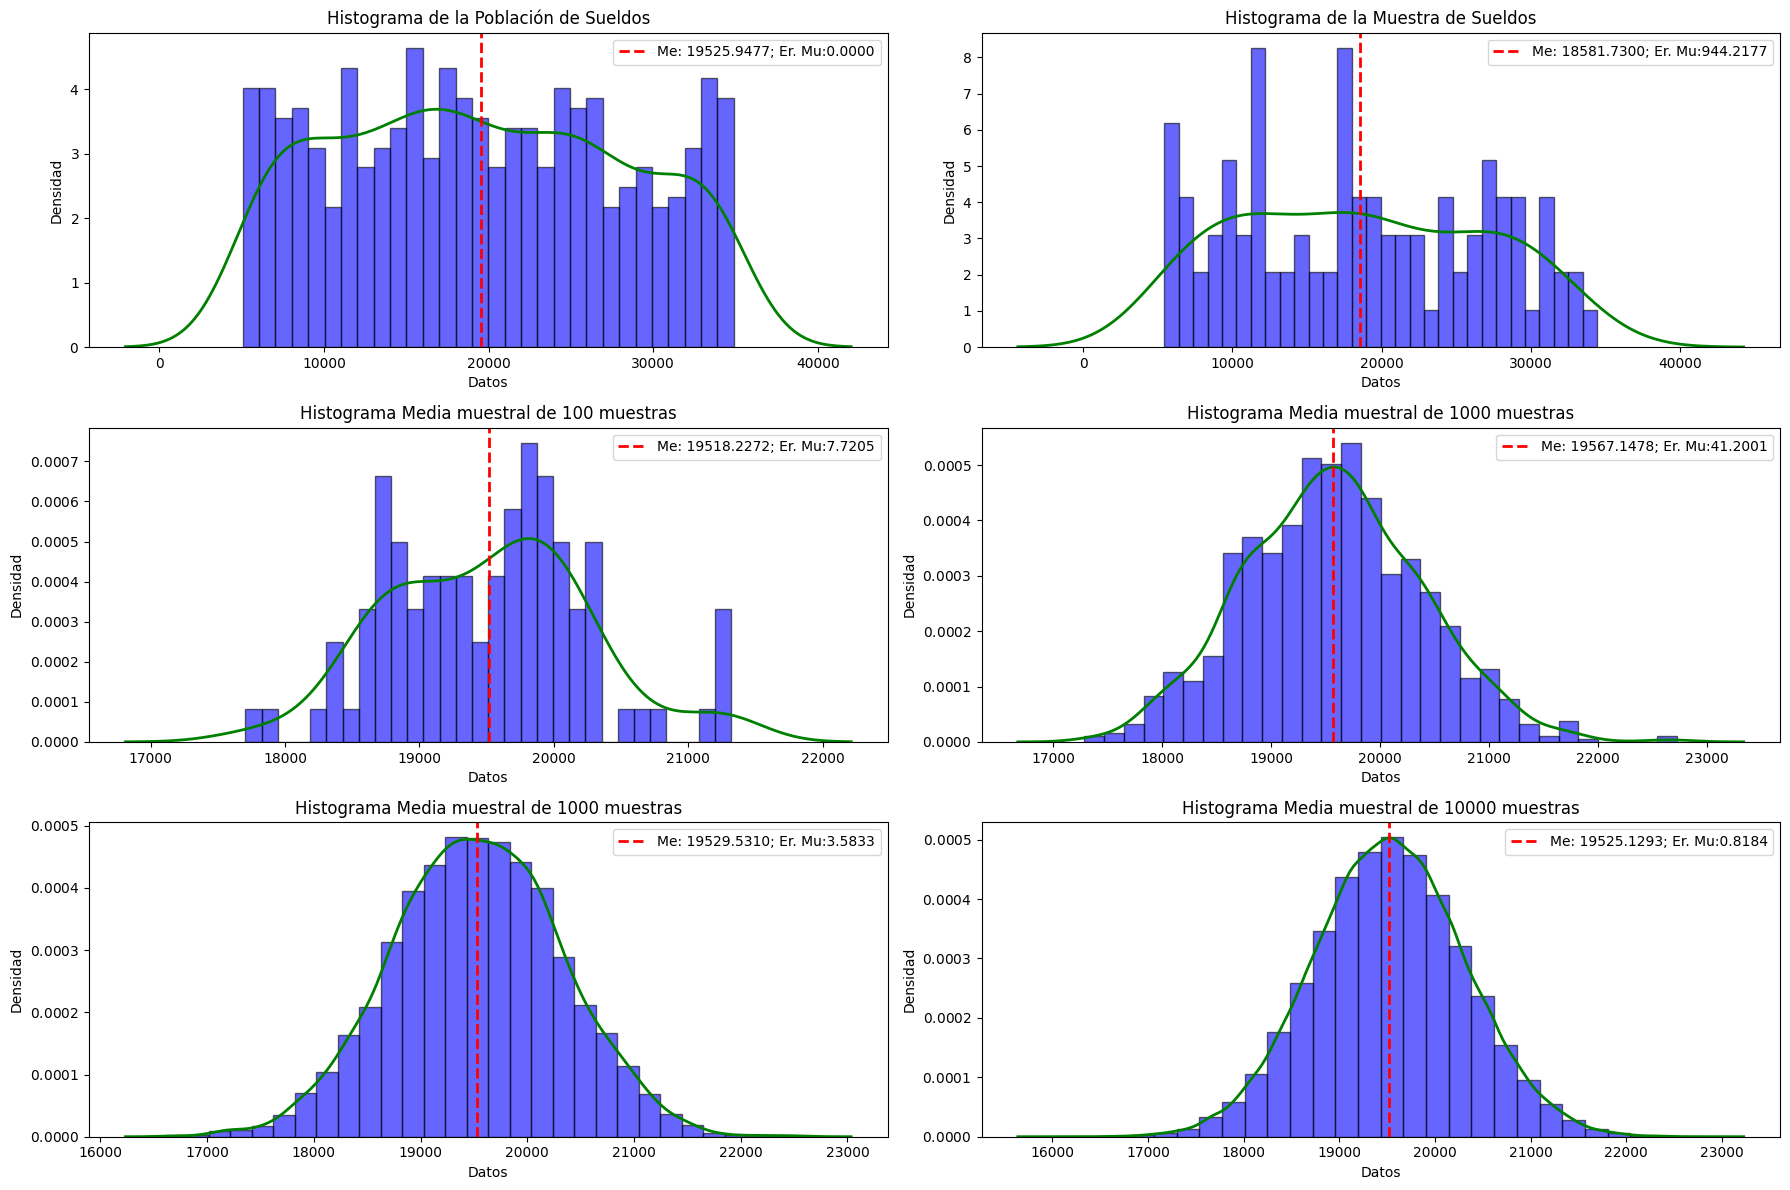

In [344]:
# Llamar a la función f_histograma para la población y la muestra
# Crear una figura con cuatro subplots en dos filas y dos columnas
fig, axs = plt.subplots(3, 2, figsize=(18, 12))

# Llamar a la función f_histograma para la población, la muestra y las medias muestrales
f_histograma(axs[0, 0], sueldos, 0, 'de la Población de Sueldos')
f_histograma(axs[0, 1], muestra, error_muestral, 'de la Muestra de Sueldos')
f_histograma(axs[1, 0], m_muestras_100, error_muestral_100, 'Media muestral de 100 muestras')
f_histograma(axs[1, 1], m_muestras_1000, error_muestral_1000, 'Media muestral de 1000 muestras')
f_histograma(axs[2, 0], m_muestras_10000, error_muestral_10000, 'Media muestral de 1000 muestras')
f_histograma(axs[2, 1], m_muestras_100000, error_muestral_100000, 'Media muestral de 10000 muestras')
# Mostrar los histogramas
plt.tight_layout()
plt.show()

# Interpretación

Una distribución muestral de la media es una distribución de las medias de múltiples muestras tomadas de una población.

Es una herramienta fundamental en estadística inferencial, ya que permite hacer inferencias sobre la población a partir de las estadísticas de las muestras.

La importancia de la distribución muestral de la media es para empelarse como herramienta en aspectos tales como:

* En estimación de Parámetros: Permite estimar la media poblacional (𝜇) utilizando la media muestral ($\bar{x}$).

* En intervalos de confianza: Facilita la construcción de intervalos de confianza para la media poblacional.

* En pruebas de hipótesis: Es importante en la realización de pruebas de hipótesis sobre la media poblacional.

Con respecto al comportamiento de las medias muestrales entre mas muestras se tengan la distribucuion de los datos se normaliza y la media muestral de las muestras se acerca a la media poblacional.

Entonces con respecto a la media de la distribución muestral de la media $\mu_{\bar{x}}$ es igual o muy cercana a la media de la población (𝜇).

En relación a la desviación estándar de la distribución muestral de la media ($
\sigma_{\bar{x}}$) es igual a la desviación estándar de la población (𝜎) dividida por la raíz cuadrada del tamaño de la muestra (𝑛).

$$
\sigma_{\bar{x}} = \frac{\sigma}{\sqrt{n}}
$$


Lo visto en este caso da lugar a estas concusines: Si la pobación original no es normal, la distribucion muestral de las medias presenta un comportamiento de normalidad y, entre mas muestras se determinen y sus medias muestrales se calculen, la normalidad es mas definida.  Si la población original tiene una distribución normal, entonces la distribución muestral de la media también será normal, independientemente del tamaño de la muestra.  

Lo anterior da lugar al teorema de límite central, siguiente caso.





# Bibliografía

* Anderson, David R., Dennis J. Sweeney, and Thomas A. Williams. 2008. Estadística Para Administración y Economía. 10th ed. Australia • Brasil • Corea • España • Estados Unidos • Japón • México • Reino Unido • Singapur: Cengage Learning,.

* Lind, D., Marchal, W., & Wathen, S. (2015). Estadística aplicada a los negocios y la econmía. DécimoSexta edición. ISBN: 978-607-15-1303-8. México, D.F: McGRAW-HILL/INTERAMERICANA EDITORES, S.A. DE C.V.

* Mendenhall, William, Robert J. Beaver, and Barbara M. Beaver. 2006. Introducción a La Probabilidad y Estadística. 13a Edición.

* Walpole, Ronald E., Raymond H. Myers, and Sharon L. Myers. 2012. Probabilidad y Estadística Para Ingeniería y Ciencias. Novena Edición. México: Pearson.

* ChatGPT 4.0 (2024)